In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
data = pd.read_csv('data/training_c.csv')
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25.0,130,80.0,72.0,98,86.0,high risk
1,35.0,140,90.0,72.0,98,70.0,high risk
2,29.0,90,70.0,72.0,100,80.0,high risk
3,30.0,140,85.0,72.0,98,70.0,high risk
4,35.0,120,60.0,61.0,98,76.0,low risk
...,...,...,...,...,...,...,...
1004,48.0,120,80.0,72.0,98,88.0,high risk
1005,22.0,120,60.0,72.0,98,80.0,high risk
1006,55.0,120,90.0,72.0,98,60.0,high risk
1007,35.0,85,60.0,72.0,98,86.0,high risk


In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

Dividiamo dataset per training set e test set

In [4]:
X = data.drop("RiskLevel", axis=1) #contiene le features
y = data['RiskLevel'] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,random_state = 42)

Quindi abbiamo il Training set (X_train, y_train) utilizzato per addestrare il modello. Il Test set (X_test, y_test) è utilizzato per valutare le prestazioni del modello.


Standardizziamo i dati

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Il miglior valore di k è: 1


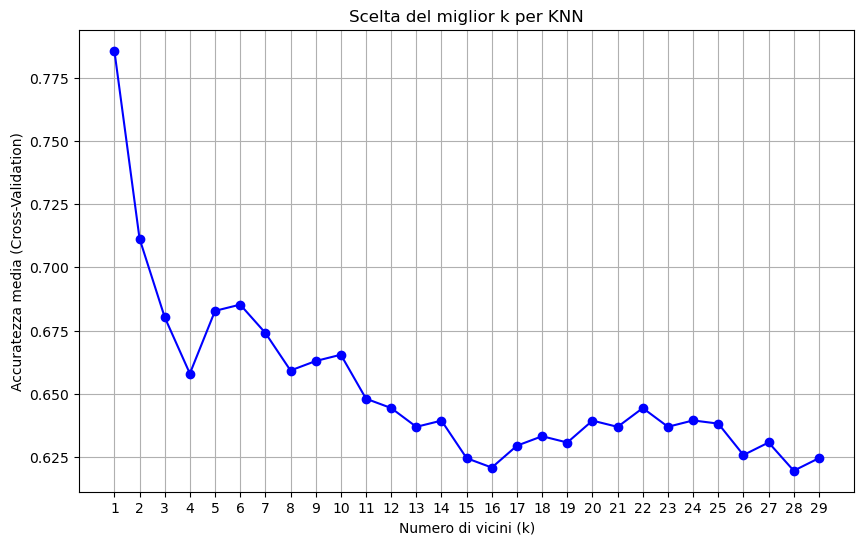

In [6]:
k_values = range(1, 30)  # Prova k da 1 a 30
cv_scores = []  # Salva le accuracy per ogni valore di k

# Loop su ogni valore di k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Definisci il modello KNN
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # Validazione incrociata
    cv_scores.append(scores.mean())  # Calcola l'accuratezza media per k

# Trova il valore ottimale di k
optimal_k = k_values[np.argmax(cv_scores)]
print(f"Il miglior valore di k è: {optimal_k}")

# Visualizza i risultati
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Numero di vicini (k)")
plt.ylabel("Accuratezza media (Cross-Validation)")
plt.title("Scelta del miglior k per KNN")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [7]:
model =KNeighborsClassifier(n_neighbors=1, p=2)
model.fit(X_train, y_train) #addestramento sui dati training

KNeighborsClassifier(n_neighbors=1)

In [8]:
y_pred = model.predict(X_test) #predizione sui nuovi dati test

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8564


In [9]:
cross_val_score(model, X, y, cv=10).mean()

0.8454554455445544

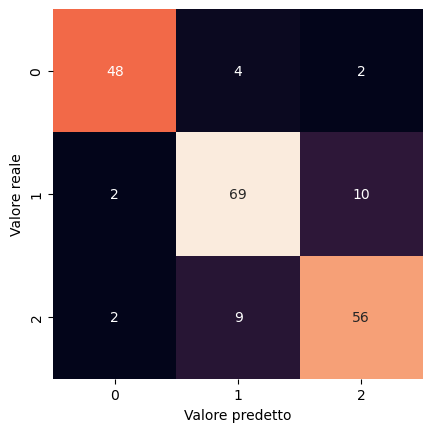

In [10]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat, square = True, annot= True, cbar= False)
plt.xlabel("Valore predetto")
plt.ylabel("Valore reale");

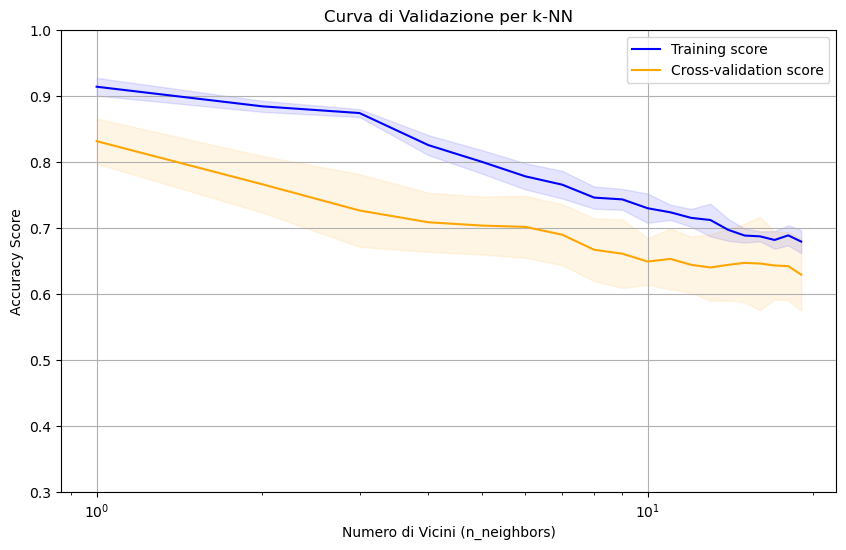

In [11]:
from sklearn.model_selection import validation_curve
# Definisci i parametri della curva di validazione
param_range = np.arange(1, 20, 1)  # Esempio: valori da 1 a 9 per il numero di vicini

# Calcola le curve di validazione
train_scores, test_scores = validation_curve(
    model, X, y, param_name="n_neighbors", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1)

# Calcola la media e la deviazione standard dei punteggi
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Visualizza la curva di validazione
plt.figure(figsize=(10, 6))
plt.title('Curva di Validazione per k-NN')
plt.xlabel('Numero di Vicini (n_neighbors)')
plt.ylabel('Accuracy Score')
plt.ylim(0.3, 1.0)  # Imposta l'intervallo sull'asse y

plt.grid()

plt.semilogx(param_range, train_scores_mean, label='Training score', color='blue')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.semilogx(param_range, test_scores_mean, label='Cross-validation score', color='orange')
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='orange')

plt.legend(loc='best')
plt.show()

Asse X:

I valori del parametro analizzato (in questo caso, n_neighbors per il KNN).
Asse Y:

L'accuratezza media del modello (o un'altra metrica scelta).
Linea Blu:

Performance del modello sui dati di training.
Può diminuire all'aumentare della complessità del modello.
Linea Verde:

Performance del modello sui dati di validazione.
Può migliorare inizialmente, ma tende a diminuire quando il modello è troppo complesso.

<h1>Curva di Apprendimento

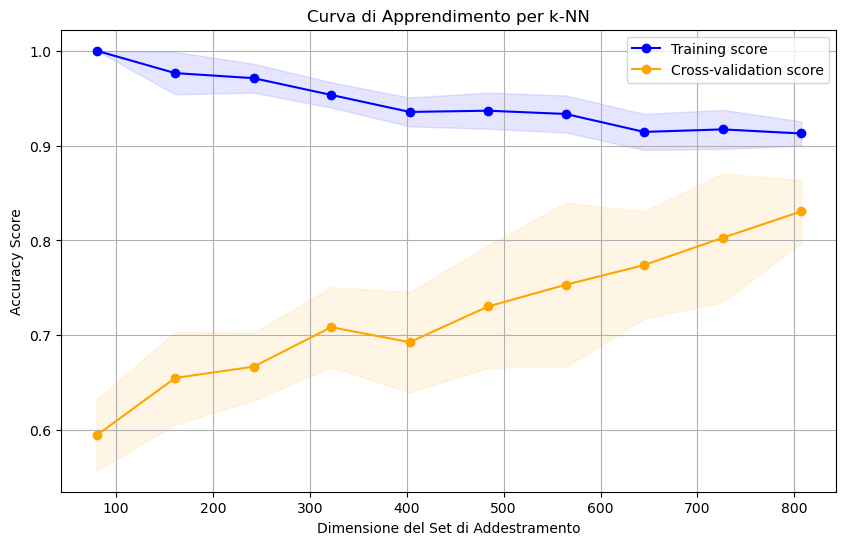

In [12]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Definisci i parametri della curva di apprendimento
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1)

# Calcola la media e la deviazione standard dei punteggi
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Visualizza la curva di apprendimento
plt.figure(figsize=(10, 6))
plt.title('Curva di Apprendimento per k-NN')
plt.xlabel('Dimensione del Set di Addestramento')
plt.ylabel('Accuracy Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='orange')
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Cross-validation score')

plt.legend(loc='best')
plt.show()


Cosa rappresenta: Il "training score" è la prestazione del modello sui dati di addestramento (training set).

Come viene calcolato: Durante l'addestramento del modello su una certa quantità di dati di addestramento, il modello viene valutato su quei dati stessi. Quindi, il training score è una misura dell'accuratezza del modello sui dati che ha effettivamente visto durante l'addestramento.

Aspettativa: In generale, il training score sarà alto perché il modello è stato addestrato su questi dati, e quindi può imparare bene da essi, specialmente per modelli complessi.



Cosa rappresenta: Il "cross-validation score" è la prestazione del modello sui dati di validazione (o test set nel contesto della cross-validation).

Come viene calcolato: Durante il processo di cross-validation, i dati vengono divisi in più fold (partizioni). Il modello viene addestrato su una parte dei dati (fold di addestramento) e testato su un'altra parte (fold di validazione). Questo processo viene ripetuto per ogni fold, e l'accuratezza media sui fold di validazione diventa il cross-validation score.

Aspettativa: Il cross-validation score serve a testare come il modello generalizza su dati che non ha visto durante l'addestramento. Se il modello generalizza bene, il cross-validation score sarà simile al training score.



Training score misura quanto bene il modello si adatta ai dati di addestramento, mentre cross-validation score misura quanto bene il modello si comporta su dati che non ha mai visto, ovvero come si generalizza a nuovi dati.

Se c'è una differenza significativa tra i due:

Training score elevato e cross-validation score basso: Il modello sta overfittando, ovvero ha imparato troppo bene i dettagli del training set ma non riesce a generalizzare.
Entrambi bassi: Il modello underfitta, cioè non è in grado di apprendere bene nemmeno dai dati di addestramento.



Nel grafico che stai tracciando:

La linea blu rappresenta il training score.
La linea arancione rappresenta il cross-validation score.
Le aree ombreggiate attorno a ciascuna delle linee indicano la deviazione standard delle prestazioni del modello. Se l'area è ampia, significa che c'è molta varianza nei risultati (ad esempio, se il modello sta overfittando, ci sarà una grande differenza tra i due punteggi).

<h1>Grid search